<a href="https://colab.research.google.com/github/Ethan-Jeong/test_deeplearning/blob/master/reuter_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
(x_train,y_train),(x_test , y_test) = tf.keras.datasets.reuters.load_data(num_words=10000)
x_train.shape , y_train.shape , x_test.shape , y_test.shape

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


((8982,), (8982,), (2246,), (2246,))

In [3]:
print(y_train[50] , x_train[50])

4 [1, 1479, 1197, 71, 8, 25, 1479, 1197, 640, 71, 304, 471, 80, 9, 1379, 1901, 4530, 6797, 79, 5, 8144, 71, 175, 80, 58, 4, 1279, 5, 63, 32, 20, 5, 4, 326, 175, 80, 335, 7, 10, 845, 31, 4, 221, 9, 108, 259, 1479, 1197, 640, 8, 16, 600, 69, 68, 11, 15, 6, 8144, 21, 397, 321, 6, 438, 1761, 3072, 79, 5, 8144, 1040, 894, 1051, 617, 80, 4, 617, 80, 23, 1051, 172, 3814, 3206, 8144, 175, 79, 9, 1379, 6, 264, 395, 3814, 3206, 79, 1479, 1197, 9, 25, 323, 8, 4, 8144, 80, 23, 381, 43, 42, 205, 50, 77, 33, 909, 9, 3509, 22, 216, 6, 216, 17, 12]


In [4]:
len(x_train[50]),len(x_train[100]),len(x_train[500]),len(x_train[1000])

(118, 409, 170, 626)

In [5]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,maxlen=500)
len(pad_x_train)

8982

In [6]:
import numpy as np

In [7]:
np.unique(y_train) , len(np.unique(y_train))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]), 46)

# make model

In [8]:
model = tf.keras.models.Sequential()

In [9]:
model.add( tf.keras.layers.Embedding(input_length=500,input_dim=10000, output_dim=24) ) # output_dim , 차원의 숫자를 뜻하며 임의로 숫자 설정할수 있음 

model.add( tf.keras.layers.LSTM( 24 , return_sequences=True, activation='tanh')) # 차원의 숫자를 넣으면 됨
model.add( tf.keras.layers.LSTM( 12 , activation='tanh')) # 차원의 숫자를 넣으면 됨 , 임의의 숫자를 넣으면 됨 

# model.add( tf.keras.layers.Flatten())
model.add( tf.keras.layers.Dense(46,activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' , metrics=['acc'])


In [10]:
# hist = model.fit( pad_x_train , y_train , epochs=5 , validation_split=0.3 , batch_size=128)
hist = model.fit( pad_x_train , y_train , epochs=100 , validation_split=0.3 , batch_size=256)

Epoch 1/100
25/25 [==============================] - 23s 760ms/step - loss: 3.7071 - acc: 0.3335 - val_loss: 3.4077 - val_acc: 0.3532
Epoch 2/100
25/25 [==============================] - 18s 735ms/step - loss: 3.2209 - acc: 0.3510 - val_loss: 2.9742 - val_acc: 0.3532
Epoch 3/100
25/25 [==============================] - 18s 735ms/step - loss: 2.8068 - acc: 0.3510 - val_loss: 2.6035 - val_acc: 0.3532
Epoch 4/100
25/25 [==============================] - 18s 727ms/step - loss: 2.5506 - acc: 0.3510 - val_loss: 2.4592 - val_acc: 0.3532
Epoch 5/100
25/25 [==============================] - 18s 728ms/step - loss: 2.4648 - acc: 0.3510 - val_loss: 2.4149 - val_acc: 0.3532
Epoch 6/100
25/25 [==============================] - 18s 729ms/step - loss: 2.4369 - acc: 0.3510 - val_loss: 2.3991 - val_acc: 0.3532
Epoch 7/100
25/25 [==============================] - 18s 732ms/step - loss: 2.4260 - acc: 0.3510 - val_loss: 2.3919 - val_acc: 0.3532
Epoch 8/100
25/25 [==============================] - 18s 729ms

# Evaluation

In [11]:
model.evaluate( pad_x_train, y_train) 

281/281 [==============================] - 18s 63ms/step - loss: 1.0433 - acc: 0.7747


[1.0433140993118286, 0.7746604084968567]

In [12]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,maxlen=500)
pad_x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,maxlen=500)

In [13]:
def pad_make(x_data):
  pad_x = tf.keras.preprocessing.sequence.pad_sequences(x_data,maxlen=500)
  return pad_x

In [14]:
pad_make_x = pad_make(x_test)

In [15]:
model.evaluate(pad_make_x,y_test)

71/71 [==============================] - 5s 64ms/step - loss: 2.1985 - acc: 0.5476


[2.198503017425537, 0.5476402640342712]

In [16]:
model.evaluate( pad_x_test , y_test)

71/71 [==============================] - 4s 63ms/step - loss: 2.1985 - acc: 0.5476


[2.198503017425537, 0.5476402640342712]

In [17]:
import matplotlib.pyplot as plt

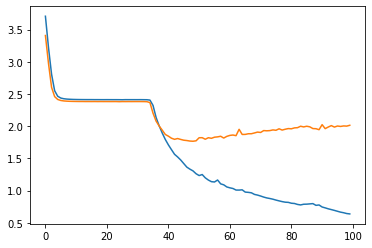

In [18]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

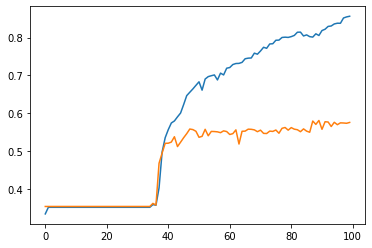

In [19]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

In [23]:
from sklearn.metrics import classification_report

In [24]:
y_train_pred = model.predict(pad_x_train)
y_train_pred[0]

array([8.5432759e-05, 2.7134684e-03, 3.2009855e-05, 9.6355569e-01,
       1.6289251e-02, 3.6405276e-05, 6.2834675e-05, 5.6618373e-05,
       4.1498311e-04, 1.6279760e-04, 5.2553264e-04, 4.0665148e-03,
       8.8073510e-05, 4.6801500e-04, 3.0174038e-05, 6.2761195e-05,
       5.4771136e-03, 5.0288028e-05, 9.1918046e-05, 9.5723994e-04,
       3.4188226e-04, 2.5260969e-04, 4.8438327e-05, 8.9691799e-05,
       7.4981908e-05, 1.5175404e-04, 4.4863973e-05, 3.1811531e-05,
       1.4269910e-03, 8.7866538e-05, 7.0859482e-05, 1.6873618e-04,
       4.7464404e-05, 4.2504802e-05, 8.4040403e-05, 7.4903073e-05,
       7.8229385e-04, 2.2893415e-05, 1.7987551e-04, 4.9755035e-04,
       2.0467873e-05, 2.6670863e-05, 1.3559703e-04, 2.4475423e-05,
       1.6731890e-05, 2.6764681e-05], dtype=float32)

In [25]:
import numpy as np

In [29]:
y_pred = np.argmax(y_train_pred,axis=1)
y_pred.shape

(8982,)

In [ ]:
print(classification_report(y_train,y_pred))

In [32]:
y_test_pred = model.predict(pad_x_test)

In [36]:
y_pred = np.argmax(y_test_pred,axis=1)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.27      0.27      0.27       105
           2       0.08      0.10      0.09        20
           3       0.87      0.90      0.88       813
           4       0.74      0.67      0.70       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.16      0.26      0.20        38
           9       0.11      0.32      0.16        25
          10       0.12      0.17      0.14        30
          11       0.19      0.27      0.22        83
          12       0.00      0.00      0.00        13
          13       0.05      0.08      0.06        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.17      0.28      0.21        99
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
